# Support Vector Machines


## SVM 이란


Support Vector Machine(SVM)이란 두 클래스로부터 최대한 멀리 떨어져 있는 **결정 경계**를 이용한 분류기로 아래와 같은 특징을 가진다.

- 선형, 비선형 분류 모두 가능하며 회귀, 이상치 탐지에 사용된다.

- 복잡한 분류 문제를 효율적으로 분류한다.

- 데이터셋이 작거나 중간 크기일 때 적합하다.


서포트 벡터 머신은 두 클래스 사이의 결정 경계와 샘플 사이의 **마진**을 최대화하는 것이다. 즉, 결정 경계와 가장 가까운 샘플 사이의 거리가 가장 큰 것을 찾는 것이다. 이를 **라지 마진 분류**라고 한다.

<br>

예를 들어보자.

아래와 같은 이미지가 있을 때 두 클래스를 분류하기 위해서는 좌측과 같이 여러 선을 그을 수 있다.

이때 우측과 같이 결정 경계와 가장 가까운 샘플 사이의 거리가 가장 큰 선을 찾는 것이다. 이때 결정 경계와 가장 가까운 샘플 사이의 거리를 **마진**이라고 한다.

붉은색으로 표시된 부분이 두 클래스를 구분하는 결정 경계에 가장 가까이 위치하는 샘플이며 이 두 샘플을 기준으로 결정 경계를 그을 수 있다.

이 두 샘플을 **서포트 벡터**라고 하며 **마진**이 최대화 되는 결정경계를 찾고 이를 기반으로 분류를 수행하는 기계학습 기법이 **Support Vector Machine**, 즉 **SVM**이다.


<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/end_to_end_project/large_margin_classification_plot.png">


**용어 정리**

- 서포트 벡터: 도로의 양쪽 경계에 위치하는 샘플

- 도로: 결정 경계와 가장 가까운 샘플 사이의 거리

- 마진: 도로의 폭

- 결정 경계: 도로의 중앙선

<br>

SVM은 마진, 그리고 결정경계를 어떻게 설정하느냐에 따라 선형, 비선형 분류를 수행할 수 있으며 각각 하드, 소프트 마진이라고 부른다.

> 위 예시 이미지는 선형 임으로 하드 마진 SVM에 해당한다.


In [1]:
# 해당셀은 기본적인 라이브러리와 setup을 수행하는 코드로 구성되어 있습니다.
# Base setup

# Load system modules
import os
import sys


# Load modules for data handling
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


# Path setup
main_path = os.getcwd().split(
    'muchine_learninng_notebook')[0] + 'muchine_learninng_notebook/codes'
datasets_path = os.path.join(main_path, 'datasets')

sys.path.append(main_path)


# graph setup
# 깔금한 그래프 출력을 위해
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Set seed
np.random.seed(42)
random_seed = 42

## 하드 마진 SVM


선형적인 결정경계를 가지는 SVM을 **하드 마진 SVM** 이라고 부른다. 모든 훈련 샘플이 도로 바깥쪽에 올바르게 분류되도록 하는 마진 분류이다.

특성의 **스케일을 조정함을 통해 더 좋은 결정경계를 형성**할 수 있어 StandardScaler를 사용하여 데이터의 스케일링을 수행한 SVM 모델을 학습한다.

코드를 통해 확인해보자.


In [2]:
# Load data
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

# 이진 분류를 수행하기 위하여 y가 0 또는 1인 X와 y값만들 가져온다.
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
set(y)

{0, 1}

### SVM 모델의 필요성


무작위로 생성한 3개의 결정경계과 SVM을 통해 생성한 결저경계를 비교하여 SVM의 필요성을 알아보자.


In [3]:
# SVM 분류 모델
# SVC (Support Vector Classification)는 SVM의 한 형태로, 분류 문제를 위해 설계되었다. 본 과정에서는 SVC와 SVM을 동일시 하여도 된다.
from sklearn.svm import SVC

# 하드 마진(선형 분류) SVM 모델을 생성
svm_clf = SVC(kernel="linear", C=float("inf"))

# 데이터를 적합한다.
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

그림 저장: large_margin_classification_plot


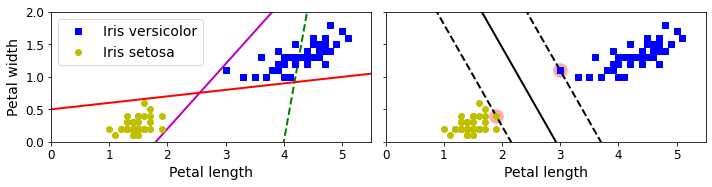

In [4]:
# 먼저 SVM을 사용하지 않고 무작위로 결정경계를 생성하였을 때 데이터를 분류하기 어렵다는 것을 확인해보자.

# 임의의 결정경계 3개를 생성한다.
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)


fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

# 임의의 결정경계 3개를 화면상에 나타내어 데이터를 분류하기 어렵다는 것을 확인한다.
plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

#################################################################

# 이번엔 SVC(SVM)을 통해 생성된 결정경계는 데이터를 잘 분류하고 있음을 확인해보자.
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

### 데이터 정규화의 필요성


데이터를 정규화하였을 때 더 좋은 성능을 보이는지 코드를 통해 확인해보자.


그림 저장: sensitivity_to_feature_scales_plot


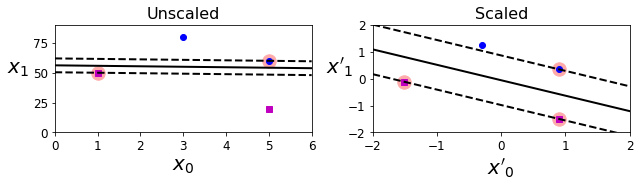

In [5]:
# 데이터를 정규화하였을 때 더 좋은 성능을 보이는지 확인하기 위해 임의의 데이터를 생성한다.
from sklearn.preprocessing import StandardScaler  # 데이터 정규화를 위한 라이브러리
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# SVM 모델을 정의한다.
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)  # SVM 학습

# 정규화를 수행하지 않았을 때 SVM이 어떻게 분류하는지 확인한다.
plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bo")
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

#################################################################

# 이번엔 데이터를 정규화한 후 SVM이 어떻게 분류하는지 확인한다.

# 데이터를 정규화한다.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)

# 정규화된 데이터를 SVM 모델에 적합시킨다.(새로 학습)
svm_clf.fit(X_scaled, ys)

# 정규화를 수행하였을 때 SVM이 어떻게 분류하는지 확인한다.
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys == 1], X_scaled[:, 1][ys == 1], "bo")
plt.plot(X_scaled[:, 0][ys == 0], X_scaled[:, 1][ys == 0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

### C : 마진 오류 조절 하이퍼 파라미터


이러한 하드 마진 SVM은 데이터가 **선형적으로 구분되는 경우에만 작동하며 이상치에 민감**히가에 2개 이상의 복잡한 분류 문제에는 적용하기 어렵다.

이상치 즉, 훈련 샘플이 도로 상에 위치하거나 결정 경계를 넘어 반대편에 위치하는 샘플을 SVM에서는 **마진 오류** 라고 부른다.

이에 데이터를 잘 분류하는 모델이란 **도로의 폭을 가능한 넓게 유지하여 마진 오류를 최소화하는 모델**이다.

SVM에서는 하이퍼 파라미터인 C를 통하여 마진 오류 비율을 설정하여 데이터를 잘 분류하는 모델을 생성할 수 있다.

<br>

전체 코드는 상당히 길기 때문에 중요한 부분만 살펴보자.

> Popeline이란:<br>데이터 처리 컴포넌트들을 연속처리 할 수 있는 sklearn의 패키지.


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# C=1인 SVM 모델을 생성한다.
# loss='hinge' 라는 것은 확률적 경사 하강법을 적용하겠다는 의미이다.
scaled_svm_clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])
scaled_svm_clf1.fit(X, y)  # 학습

# C=100인 SVM 모델을 생성한다.
scaled_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss="hinge", random_state=42)),
])
scaled_svm_clf2.fit(X, y)  # 학습

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

전체 코드는 아니지만 위 두 모델을 통해 도출된 결과를 이미지를 통해 확인해보자.

<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/screen_shot/week5-svm-c.png" />


위 이미지와 같이 C를 낮게 설정할 경우 도로폭이 넓어지고 마진 오류가 증가하여, 덜 정교하게 분류된다.

C를 낮게 설정할 경우 도로폭이 넓어지고 마진 오류가 증가하여, 덜 정교하게 분류된다.

반면 C를 높게 설정할 경우 도로폭이 좁아지고 마진 오류가 감소하여, 더 정교하게 분류된다. 하지만 이 경우 마진 오류(이상치)에 민감해져 과대적합이 발생할 수 있다.


## 소프트 마진 SVM


위와 같은 하드 마진 SVM은 데이터가 선형적으로 구분되는 경우에만 작동하며 이상치에 민감히가에 2개 이상의 복잡한 분류 문제에는 적용하기 어렵다.

이와 같은 문제를 해결하고자 아래 두 가지 방법을 통해 **비선형적인 결정경계를 형성**하여 유연한 분류를 수행하고자 하였다.

1. **특성이 추가된 선형 SVM**

2. **커널 트릭을 이용한 SVM**


### 특성이 추가된 선형 SVM


#### 다항 특성 활용


특성(변수)를 하나만 갖는 모델에 새로운 특성(변수)를 추가한 뒤 선형 SVM을 수행하는 것을 **다항 특성을 활용한 선형 SVM** 이라 부른다.

새로운 특성을 추가하여, 아래와 같이 2차원 데이터셋을 완벽하게 선형적으로 구분할 수 있다.

<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/end_to_end_project/higher_dimensions_plot.png"/>


아래는 Make_moons 데이터셋을 다항 특성을 활용한 선형 SVM을 통해 분류한 것이다.


In [ ]:
from sklearn.datasets import make_moons  # 데이터셋 불러오는 함수
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),  # 새로운 특성(변수)를 추가한다.
    ("scaler", StandardScaler()),  # 정규화
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))  # 선형 SVM 적용
])

polynomial_svm_clf.fit(X, y)  # 학습

이를 통하여 아래와 같은 비선형적인 결정경계를 유연하게 설정할 수 있다.

<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/end_to_end_project/moons_polynomial_svc_plot.png">


하지만 다항 특성을 사용한 선형 SVM은 3개 이상의 분류를 수행할 때 비효율적이라는 단점이 있다.


#### 유사도 특성 활용


> 유사도 특성 또한 다항 특성의 일종이다.

각 샘플에 대해 특정 랜드마크(landmark)와의 유사도를 측정하는 함수인 유사도 함수를 이용하여 새로운 특성을 만드는 것을 **유사도 특성 활용한 선형 SVM** 이라 부른다.

대표적인 유사도 함수에는 **가우시안 방사 기저 함수(Radial Basis Function, RBF)** 가 있다.

$$\phi(\mathbf{x}, \ell)=\exp \left(-\gamma\|\mathbf{x}-\ell\|^2\right)$$

$\ell$는 랜드마크이며 $\gamma$는 랜드마크에서 멀어질수록 0에 수렴하는 속도를 조절하는 하이퍼 파라미터이다.

유사도 함수를 적용함으로써 차원이 커져 선형적으로 구분될 가능성이 높아진다. 하지만 훈련 세트가 매우 클 경우 동일한 크기의 특성이 많이 생성된다.

<br>

이와 같은 다항식 특성은 간단하며 머신러닝 알고리즘에 잘 작동하지만, 차수가 낮을 경우 복잡한 데이터셋을 잘 표현하지 못하며 차수가 높을 경우 많은 특성을 추가해야 하므로 모델의 속도가 느려진다.


### 커널 트릭을 이용한 SVM


커널 트릭을 이용한 SVM은 특성을 추가하지 않고도 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.

특성을 추가하지 않음으로 많은 수의 특성 조합이 생기지 않아 모델의 속도가 느려지는 것을 방지할 수 있다.

다항식 커널은 SVC 클래스의 kernel='poly' 옵션을 통해 설정할 수 있으며 커널 트릭을 이용한 SVM은 아래와 같이 작성될 수 있다.


In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

SVC 클래스의

- degree는 다항식의 차수이다. 만약 degree가 3일 경우 커널은 주어진 두 벡터의 내적을 3차 다항식으로 계산한다.

- coef0: 다항식에서 높은 차수와 낮은 차수 항의 균형을 조절하는 변수로 coef0이 클수록 낮은 차수의 항에 더 많은 중요도가 부여된다.

3. C 옵션은 마진 오류를 조절한다. C가 클 경우 마진 오류가 작아지며, C가 작을 경우 마진 오류가 커진다.


#### 가우시안 RBF 커널


가우시안 RBF 커널은 커널 트릭을 이용한 SVM 모델 중 하나로 kernel='rbf' 옵션을 통해 설정할 수 있다.

가우시안 RBF 커널은 아래와 같이 작성될 수 있다.


In [ ]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

가우시안 RBF 커널은 하이퍼 하아미터인 gamma를 추가로 입력받는다.

gamma가 클 경우 가우시안 RBF 커널의 반경이 작아져(그래프 모양이 좁아져) 각 샘플의 영향 범위가 작아지며, 결정 경계가 불규칙하고 구부러진다.

반대로 gamma가 작을 경우 가우시안 RBF 커널의 반경이 커져(그래프 모양이 넓어져) 각 샘플의 영향 범위가 커지며, 결정 경계가 부드러워진다.

즉, gamma가 클 경우 모델이 과대적합될 가능성이 높아지며, gamma가 작을 경우 모델이 과소적합될 가능성이 높아진다.

따라서 모델의 복잡도를 조절하기 위해서는 gamma와 C 하이퍼 파라미터를 함께 조절해야 한다.

<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/end_to_end_project/moons_rbf_svc_plot.png">


#### 참고!!

sklearn에는 SVC 클레스와 더불어 LinearSVC 클래스가 존재한다. LinearSVC 클래스는 선형 SVM을 위한 최적화된 알고리즘으로 구성된 클래스로 **커널 트릭을 지원하지 않지만** 데이터 수와 특성에 따라 **선형적으로 학습시간이 증가**하기에 일반적인 SVC보다 빠른다.

> LinearSVC 클랫는 O(m x n)의 시간 복잡도를 가지는 반면 SVC는 O(m^2 x n)에서 O(m^3 x n)사이의 시간 복잡도를 가진다.


## SVM 회귀


SVM은 분류뿐만 아니라 회귀에서도 사용할 수 있다.

SVM 회귀는 제한된 마진 오류(도로 밖의 샘플) 안에 가능한 많은 샘플이 들어가도록 학습한다.

이를 통해 제한된 마진 오류 내에서 새로 입력된 샘플에 대한 예측을 수행한다.


### 선형 SVM 회귀


선형 SVM 회귀는 sklearn의 LinearSVR을 통해 구현할 수 있으며 아래와 같이 작성할 수 있다.


In [7]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

마진 오류 수치(도로의 폭)은 하이퍼파라미터인 epsilon($\epsilon$)을 통해 조절할 수 있다.

eposilon이 클 경우 도로의 폭이 넓어지며, epsilon이 작을 경우 도로의 폭이 좁아진다.

<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/end_to_end_project/svm_regression_plot.png">


### 비선형 SVM 회귀


커널 SVM 모델을 통새 비선형 회귀 작업을 처리할 수 있으며 아래와 같이 작성된다.


In [ ]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)

C 옵션을 통하여 가중치 규제 여부를 결정할 수 있다. C값이 클수록 가중치 규제가 감소하여 각각의 샘플에 더 민감하게 반응할 수 있으나 과대적합될 가능성이 높아진다.


## SVM 이론


### SVM 기본 이론


선형 SVM 분류기 모델은 퍼셉트론의 기본적인 형태와 상당히 유사하다.

$h(x) = w^Tx + b$를 통해 선형 SVM은 결정 경계를 형성하며 결정 경계를 통한 예측값을 아래 수식을 통해 계산한다.

$$\hat{y}=\left\{\begin{array}{ll}0 & \text { if } w^{T} x+b<0 \\ 1 & \text { if } w^{T} x+b \geq 0\end{array}\right.$$

결정 함수와 값이 존재하는 평면(z값이 0인 파란색 평면)의 값이 0인 점들의 집합은 두 평면의 교차점이며 이를 **결정 경계**라고 한다.

아래 그래프에서 파랑색 평면은 값이 존재하는 차원이며 격자 형태의 평면은 결정 함수이다. 이 두 평면의 교차점 즉, 결정 함수의 값이 0인 점들의 집합이 결정경계이며 검정색 실선으로 표시되어 있다.

<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/end_to_end_project/iris_3D_plot.png">

<br>

우리는 결점 함수의 가중치인 w값을 조절하여 마진 즉, 도로의 폭을 조절할 수 있다.

결정 함수의 기울기가 작아질 수록 마진 폭이 커짐으로 결정 함수의 기울기가 w의 절댓값에 비례함을 알 수 있다. 이는 아래 그래프를 통해서도 확인 할 수 있다.

<img width="60%" src="https://raw.githubusercontent.com/jaewonE/muchine_learning_notebook/main/codes/images/end_to_end_project/small_w_large_margin_plot.png">

이전 3차원 그래프에서 점선으로 표시된 부분은 h 즉, 결정 함수의 값이 1인 점들의 집합 가중치인 w값을 통해 이 도로의 폭을 조절할 수 있다.

따라서 선형 SVM 분류기를 훈련한다는 것은 마진 오류를 하나도 발생하지 않거나(하드 마진) 제한적인 마진 오류를 가지면서(소프트 마진) 가능한 마진을 크게 하는 w와 b값을 찾는 것이다.


### 하드마진과 소프트 마진의 목적 함수


선형 SVM 분류기를 훈련할 때 하드마진 분류기는 마진 오류를 하나도 발생하지 않는 w와 b값을 찾는 것이 목표이다. 이를 위해서는

- 모든 양성 샘플에 대한 결정 함수의 값이 1보다 크거나

- 모든 음성 샘플에 대한 결정 함수의 값이 -1보다 작아야 한다.

이를 위한 목적함수는 $\frac{1}{2}w^Tw$이며, 제약 조건은 $t^{(i)}(w^Tx^{(i)}+b) \geq 1$이다.

> 제약 조건식은 단순히 위 내용을 식으로 표현한 것이다. 실제로 $x^{(i)}$는 i번째 샘플을 의미하며, $t^{(i)}$는 양성 샘플일 때 1, 음성 샘플일 때 -1을 반환함으로 위에서 말로서 풀이한 내용과 동일함을 확인할 수 있다.

<br>

소프트 마진 분류기는 제한된 마진 오류를 가지면서 가능한 큰 마진을 가지는 w와 b값을 찾는 것이 목표이다. 이를 위해서는

- 모든 샘플에 대한 결정 함수의 값이 지정된 값 이상 또는 이하이여야 한다.

이를 조절하기 위하여 목적 함수에 마진 오류인 $C$를 추가하여 두 목표 사이의 트레이드오프를 조절한다.

이를 위한 목적함수는 $\frac{1}{2}w^Tw + C\sum_{i=1}^{m}\zeta^{(i)}$이며, 제약 조건은 $t^{(i)}(w^Tx^{(i)}+b) \geq 1 - \zeta^{(i)}$이다.

> $\zeta^{(i)}$ 은 슬랙 변수로 i번째 샘플이 얼마나 마진을 위반할지 결정한다.
